# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-12-06 20:35:03.009965: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-06 20:35:03.016821: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-06 20:35:03.038235: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 20:35:03.073640: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 20:35:03.084129: E external/loc

# Load dataset

In [2]:
data = pd.read_csv('Tesla.csv')

# Select relevant columns
X = data[['Open', 'High', 'Low', 'Volume']].values
y = data['Close'].values

# Normalize the data
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y.reshape(-1, 1))

print("Normalized Features:")
print(X_scaled)
print("\nNormalized Target:")
print(y_scaled)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

Normalized Features:
[[0.01053291 0.03045963 0.00964509 0.50337694]
 [0.03553936 0.05018378 0.03134654 0.46074816]
 [0.03262991 0.03380764 0.01993068 0.21865873]
 ...
 [0.88704743 0.88929724 0.90155229 0.12682006]
 [0.90693471 0.90658317 0.91959914 0.18846874]
 [0.91282727 0.90505468 0.92766189 0.17161105]]

Normalized Target:
[[0.02993635]
 [0.02971433]
 [0.02279455]
 ...
 [0.88784039]
 [0.91122698]
 [0.9091918 ]]


# Define the model

In [3]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print model summary
model.summary()

/home/ubuntu-server/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [4]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1394 - mae: 0.2744 - val_loss: 0.0079 - val_mae: 0.0730
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mae: 0.0634 - val_loss: 2.0886e-04 - val_mae: 0.0107
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8233e-04 - mae: 0.0097 - val_loss: 1.1963e-04 - val_mae: 0.0074
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3181e-04 - mae: 0.0079 - val_loss: 1.0526e-04 - val_mae: 0.0069
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0499e-04 - mae: 0.0068 - val_loss: 1.0129e-04 - val_mae: 0.0066
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.0272e-05 - mae: 0.0061 - val_loss: 9.9317e-05 - val_mae: 0.0064
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7672e-05 - mae: 0.0064 - val_loss: 9.4815e-05 - val_mae: 0.0064
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6606e-05 - mae: 0.0063 - val_loss: 9.5672e-05 - val_mae: 0.0066
Epoch 9/50
34/34 ━━

# Evaluate the model

Mean Absolute Error: 0.0054


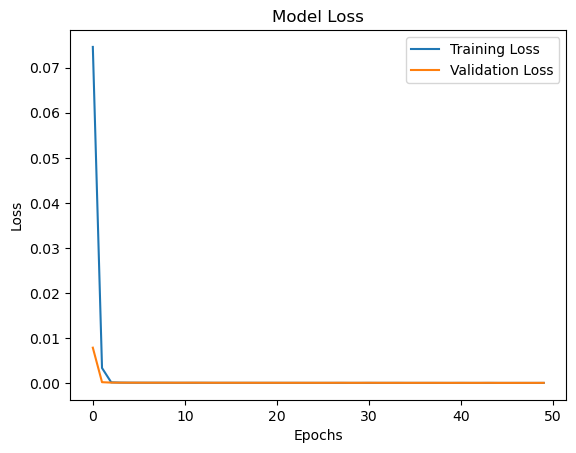

In [5]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error: {mae:.4f}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Test the model

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


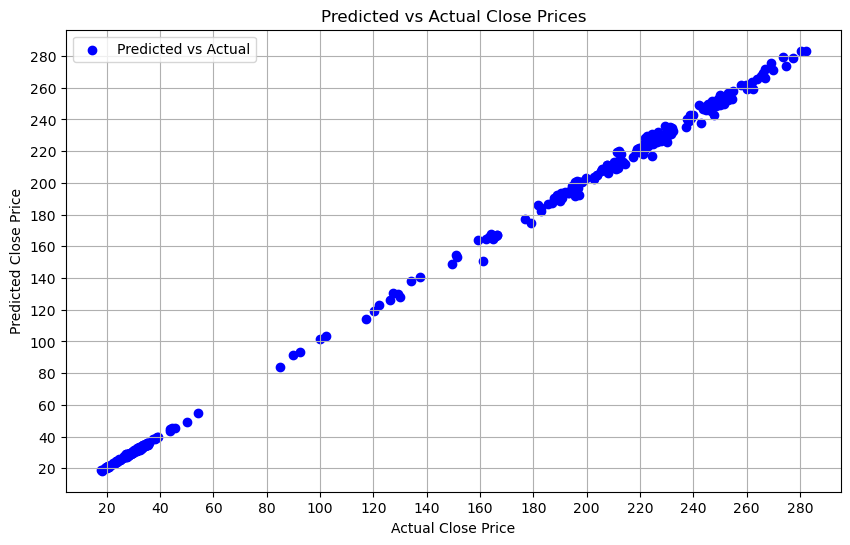

In [12]:
predictions = model.predict(X_test)

# Reverse scaling for predictions and true values
y_test_original = scalerY.inverse_transform(y_test)
predictions_original = scalerY.inverse_transform(predictions)

# Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, predictions_original, color='blue', label='Predicted vs Actual')
plt.title('Predicted vs Actual Close Prices')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(20))
plt.grid(True)
plt.legend()
plt.show()

# Real Time Testing

In [8]:
print("Enter the stock details:")
open_price = float(input("Open Price: "))
high_price = float(input("High Price: "))
low_price = float(input("Low Price: "))
volume = float(input("Volume: "))

# Prepare the input array
input_data = np.array([[open_price, high_price, low_price, volume]])
input_scaled = scalerX.transform(input_data)

# Predict the Close price (scaled)
predicted_close_scaled = model.predict(input_scaled)

# Inverse transform the prediction to get the original scale
predicted_close = scalerY.inverse_transform(predicted_close_scaled)

print(f"Predicted Close Price: {predicted_close[0][0]:.2f}")

Enter the stock details:


Open Price:  236.64
High Price:  239.71
Low Price:  235.58
Volume:  3769000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Close Price: 239.20
